## 1. Data Preparation and Exploration

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Load data
final_db = pd.read_csv('../01_data/clean_data_1.csv')
final_db

final_db.drop(['SI01_04_mod', 'SI01_04_mod', 'SI01_05_mod', 'SI01_06_mod', 'SI01_07_mod', 'SI01_08_mod', 'SI03_2_H_stat'], axis=1)

,discrimination_occurred,id,country,HH02,HH03,HH04,IN02,SI03_3_H,PB01_mod,S01_mod,...,DHE04_mod,VV10_1_mod,VV10_2_mod,RA04_mod,PB10_1_mod,PB10_2_mod,PB11_mod,arop_mod_1,res_stat_mod_1,DO27_mod
0,1,165.0,1.0,37.0,1.0,1.0,8.0,15.0,0.0,1,...,1,1,0,0,1,1,0,1.0,0,1
1,0,317.0,1.0,30.0,1.0,1.0,8.0,19.0,2.0,1,...,1,1,0,1,0,1,1,0.0,0,1
2,0,321.0,1.0,35.0,1.0,1.0,8.0,17.0,0.0,1,...,1,0,0,1,1,1,0,0.0,0,1
3,1,322.0,1.0,42.0,1.0,4.0,8.0,14.0,2.0,1,...,1,1,1,1,1,1,0,1.0,0,1
4,0,327.0,1.0,39.0,1.0,5.0,8.0,10.0,1.0,0,...,1,0,0,0,1,0,0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,0,43468.0,28.0,58.0,1.0,2.0,8.0,14.0,1.0,0,...,1,0,0,0,1,1,0,1.0,0,0
13402,0,43602.0,28.0,46.0,1.0,4.0,8.0,14.0,0.0,0,...,1,0,0,1,1,1,0,1.0,0,0
13403,1,43744.0,28.0,40.0,2.0,6.0,8.0,11.0,1.0,0,...,1,1,0,0,0,0,0,1.0,1,0
13404,0,43780.0,28.0,37.0,2.0,7.0,8.0,12.0,1.0,0,...,1,0,0,0,1,0,0,1.0,1,0


/var/folders/rc/lkcpnkds55926rr708hlfnwr0000gn/T/ipykernel_78106/416385938.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')


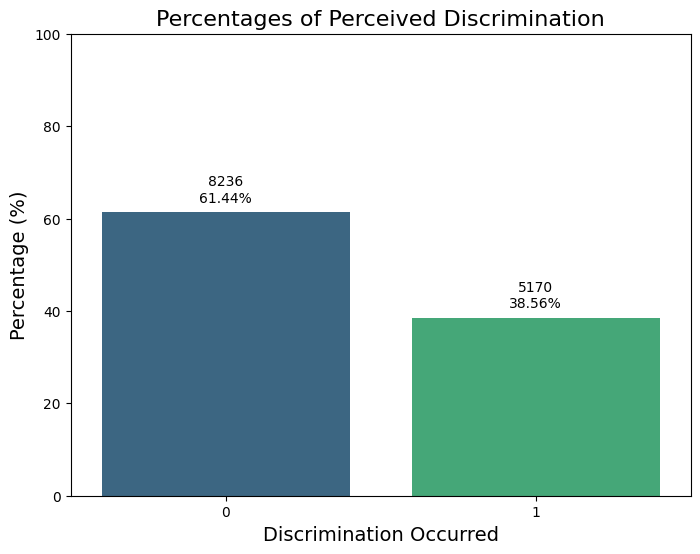

In [19]:
# Calculate the value counts
value_counts = final_db['discrimination_occurred'].value_counts()

# Calculate the percentages
percentages = value_counts / final_db.shape[0] * 100

# Round the percentages to 2 decimal places
percentages = percentages.round(2)

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')

# Add titles and labels
plt.title('Percentages of Perceived Discrimination', fontsize=16)
plt.xlabel('Discrimination Occurred', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Add total count and percentage labels at the center of the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{value_counts[i]}\n{percentages[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points', rotation=0)

# Set y-axis limits to be from 0 to 100
plt.ylim(0, 100)

# Define the folder location to save the file
folder_path = '/Users/monserratlopez/Library/CloudStorage/GoogleDrive-lopezmonserrat.14@gmail.com/My Drive/4. Education/1_Master/2_Hertie_MDS/2_SecondSemester/1_MachineLearning/2_FinalProject/Employment-Bias/04_graphs'

# Save the plot in the specified folder as a PNG
file_path = os.path.join(folder_path, 'perceived_discrimination.png')
plt.savefig(file_path, dpi=300)   

# Show the plot
plt.show()

In [8]:
final_db.head()

,discrimination_occurred,id,country,HH02,HH03,HH04,IN02,SI03_3_H,SI03_2_H_stat,PB01_mod,...,PB10_2_mod,PB11_mod,SI01_04_mod,SI01_05_mod,SI01_06_mod,SI01_07_mod,SI01_08_mod,arop_mod_1,res_stat_mod_1,DO27_mod
0,1,165.0,1.0,37.0,1.0,1.0,8.0,15.0,0.0,0.0,...,1,0,0,0,1,1,0,1.0,0,1
1,0,317.0,1.0,30.0,1.0,1.0,8.0,19.0,0.0,2.0,...,1,1,1,0,0,1,1,0.0,0,1
2,0,321.0,1.0,35.0,1.0,1.0,8.0,17.0,0.0,0.0,...,1,0,0,0,0,0,0,0.0,0,1
3,1,322.0,1.0,42.0,1.0,4.0,8.0,14.0,0.0,2.0,...,1,0,0,0,1,1,0,1.0,0,1
4,0,327.0,1.0,39.0,1.0,5.0,8.0,10.0,0.0,1.0,...,0,0,0,0,0,0,0,1.0,0,1


In [20]:
# Split data
X = final_db.drop(['discrimination_occurred'], axis=1)
y = final_db['discrimination_occurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Model Building and Evaluation

Accuracy for Random Forest: 0.7245151665837891
Random Forest Cross-Validation Accuracy: 0.7233589075703756


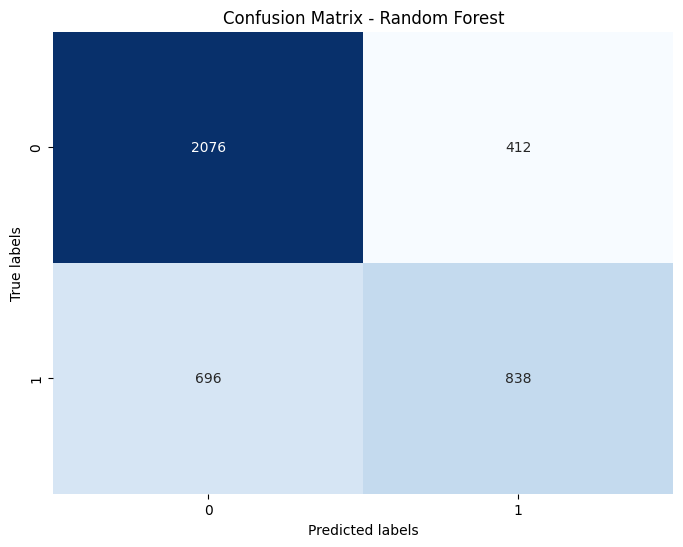

Accuracy for Logistic Regression: 0.7170561909497762
Logistic Regression Cross-Validation Accuracy: 0.7098242329716816


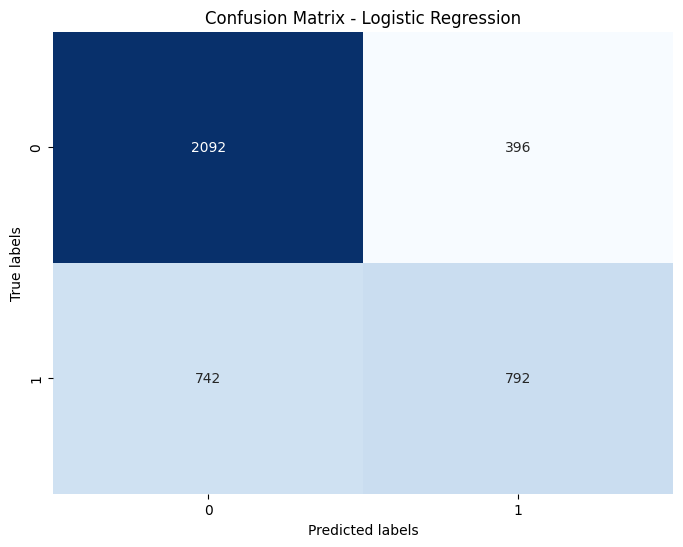

Accuracy for XGBoost: 0.7168075584286425
XGBoost Cross-Validation Accuracy: 0.7146203111847719


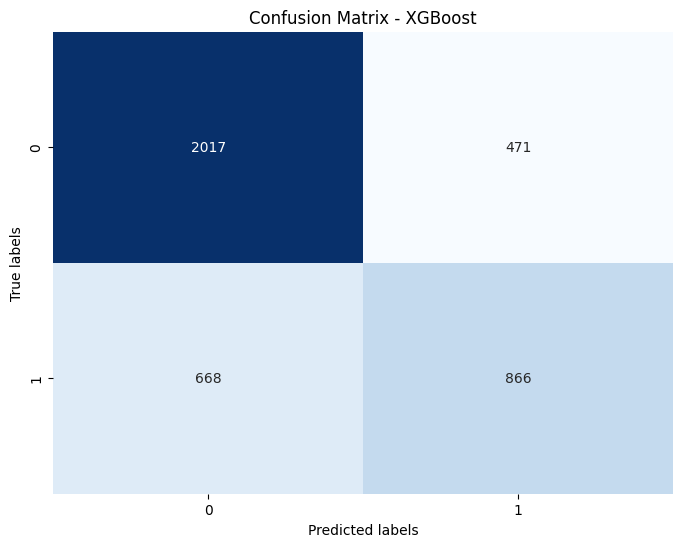

In [21]:
# Define preprocessing steps
preprocessor = StandardScaler()

# Define models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create pipelines for each model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf)])
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lr)])
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', xgb)])

# Train and evaluate models
models = [rf_pipeline, lr_pipeline, xgb_pipeline]
model_names = ['Random Forest', 'Logistic Regression', 'XGBoost']

for model, name in zip(models, model_names):
    # Train model
    model.fit(X_train, y_train)
    
    # Evaluate model
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy for {name}: {accuracy}")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean()}")
    
    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    
    # Save the plot in the specified folder as a PNG
    file_path = os.path.join(folder_path, f'confusion_matrix_{name.replace(" ", "_").lower()}.png')
    plt.savefig(file_path, dpi=300)
    
    # Show the plot
    plt.show()

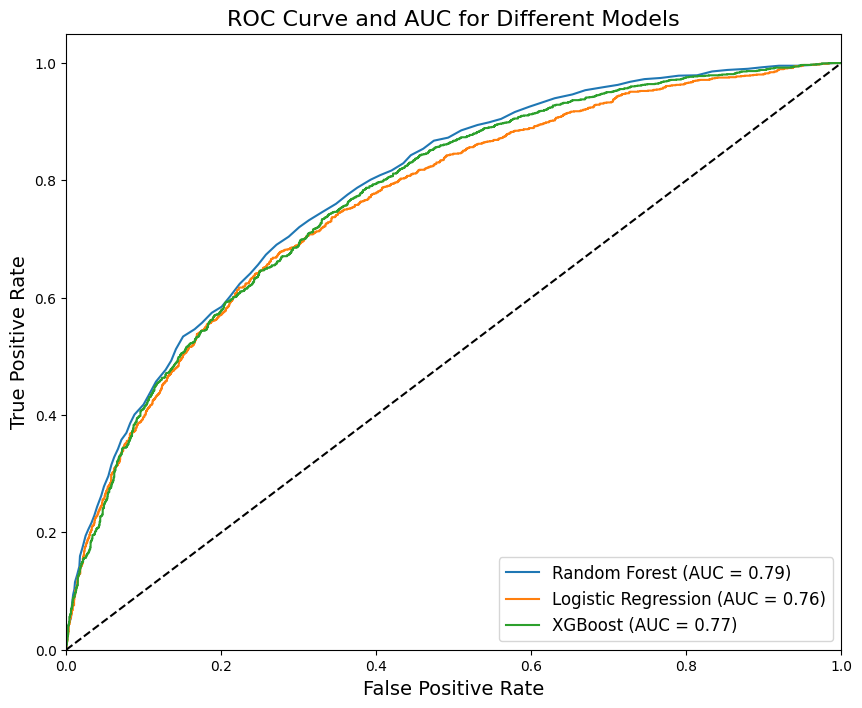

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Define models
models = [rf_pipeline, lr_pipeline, xgb_pipeline]
model_names = ['Random Forest', 'Logistic Regression', 'XGBoost']

plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    # Get the predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve and AUC for Different Models', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error

# Predict probabilities on the test set using the Random Forest model
y_pred_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Calculate the Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_prob_rf)
print(f"Mean Squared Error for Random Forest: {mse_rf:.4f}")

# Predict probabilities on the test set using Logistic Regression model
y_pred_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]
mse_lr = mean_squared_error(y_test, y_pred_prob_lr)
print(f"Mean Squared Error for Logistic Regression: {mse_lr:.4f}")

# Predict probabilities on the test set using XGBoost model
y_pred_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]
mse_xgb = mean_squared_error(y_test, y_pred_prob_xgb)
print(f"Mean Squared Error for XGBoost: {mse_xgb:.4f}")

Mean Squared Error for Random Forest: 0.1807
Mean Squared Error for Logistic Regression: 0.1883
Mean Squared Error for XGBoost: 0.1923


## Feature Importance and Hyperparameter Tuning

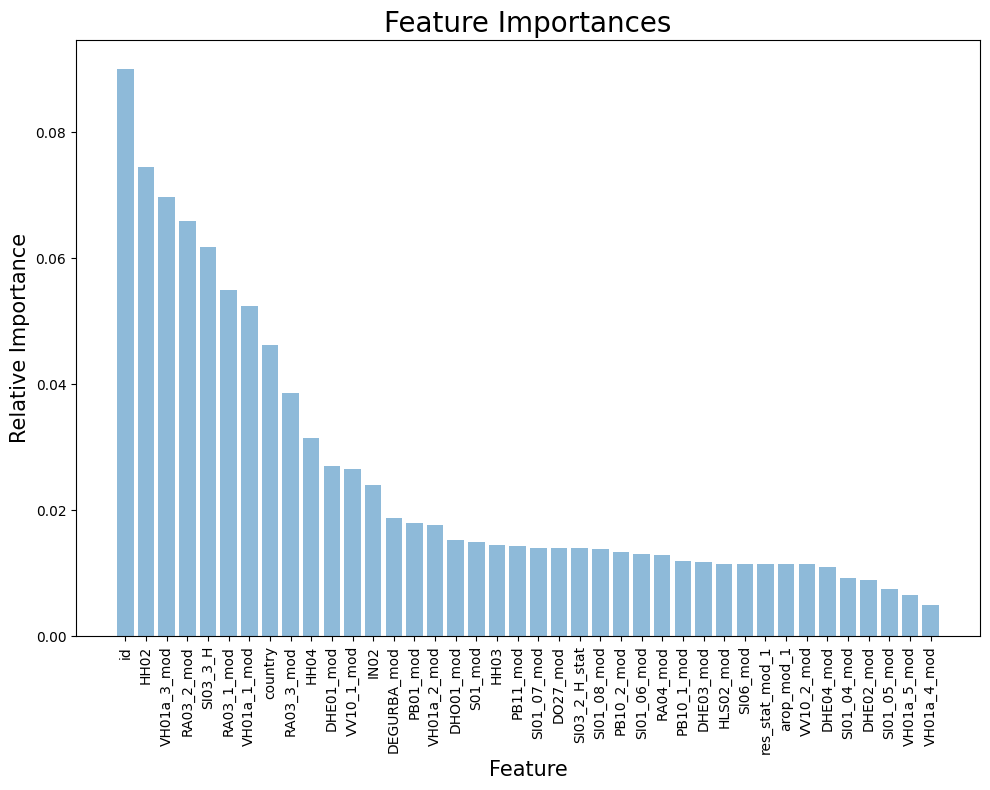

In [24]:
# Feature Importance
feature_importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()
plt.show()

In [27]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV to find the best parameters
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
cv_rf.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
best_params = cv_rf.best_params_
print("Best parameters:", best_params)

# The model is already refitted with the best parameters, so we can directly use it for evaluation
# Evaluate the model with best parameters
best_rf_score = cv_rf.score(X_test_scaled, y_test)
print("Accuracy with best parameters:", best_rf_score)


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy with best parameters: 0.7262555942317255


In [26]:
## Best parameters
best_params = cv_rf.best_params_
print("Best parameters:", best_params)

# Use best parameters to retrain the model
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Evaluate the model with best parameters
best_rf_score = best_rf.score(X_test_scaled, y_test)
print("Accuracy with best parameters:", best_rf_score)

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy with best parameters: 0.7262555942317255
